<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin          

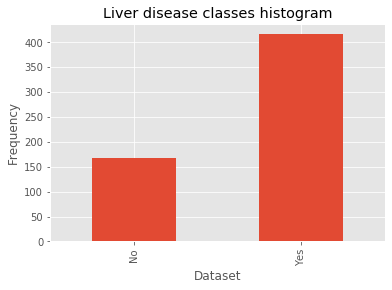

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#importing train_test_split
from sklearn.model_selection import train_test_split
#Load the dataset
df = pd.read_csv('liver_disease_.csv')

#Print the first 5 rows of the dataframe.
df.head()
df.tail()
#Let's observe the shape of the dataframe.
df.shape

df.info()
df.fillna(0, inplace=True)
#Load the dataset
df = pd.read_csv('liver_disease_.csv')

#Print the first 5 rows of the dataframe.
df.head()
df.tail()
#Let's observe the shape of the dataframe.
df.shape

df.info()
df.fillna(0, inplace=True)

count_classes = pd.value_counts(df['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

df['Dataset'] = df['Dataset'].map({"No":0,"Yes":1}) 
df['Dataset'].value_counts()
data_features=df.drop(['Dataset'],axis=1)
data_num_features=df.drop(['Gender','Dataset'],axis=1)
data_num_features.head()

data_num_features.describe()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

data_exp=pd.get_dummies(data_features_scaled)
data_exp.head()
X=data_exp
y=df['Dataset'] 
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


#Split the dataset into train and test with stratification
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
len(y_test[y_test==0])/len(y_test[y_test==1])
len(y_train[y_train==0])/len(y_train[y_train==1])
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)



    


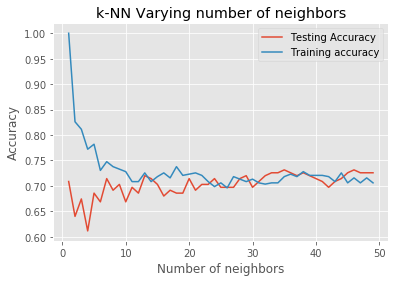

In [22]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [23]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=11)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)




array([[ 10,  40],
       [ 13, 112]], dtype=int64)

In [24]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,10,40,50
1,13,112,125
All,23,152,175


In [25]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

y_pred_proba = knn.predict_proba(X_test)[:,1]



              precision    recall  f1-score   support

           0       0.43      0.20      0.27        50
           1       0.74      0.90      0.81       125

    accuracy                           0.70       175
   macro avg       0.59      0.55      0.54       175
weighted avg       0.65      0.70      0.66       175



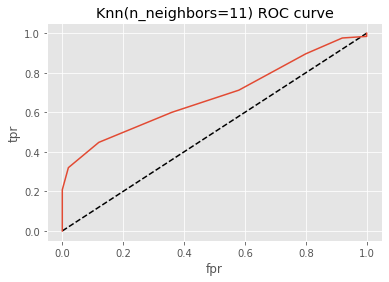

knn_cv.best_score_ 0.7289879931389366
{'n_neighbors': 41}


In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()
plt.close()
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,100)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)
print('knn_cv.best_score_',knn_cv.best_score_)
print(knn_cv.best_params_)